In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import xarray as xr

os.chdir(  "/Users/etmu9498/research/code/scripts")
import make_plots
import eyewall_slope
import cloud_height
import eyewall_slope_auto

import tc_metadata


In [25]:
# load data:
crl_path = "/Users/etmu9498/research/data/CRL_data/2021/"
crl_list = make_plots.load_crl( crl_path, print_files=False)
crl_data = crl_list[ 18]
i1 = 400
i2 = 1200
xaxis='time'
cutoff_power = -30

In [26]:
# load cloud height data
H, xaxis_value = cloud_height.find_cloud_heights(crl_data, cutoff_power, i1, i2, xaxis = xaxis)

C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


Text(0.5, 1.0, 'TC Sam, 09/26/22, Eye 1, CRL Backscattered Power and Cloud Top Heights')

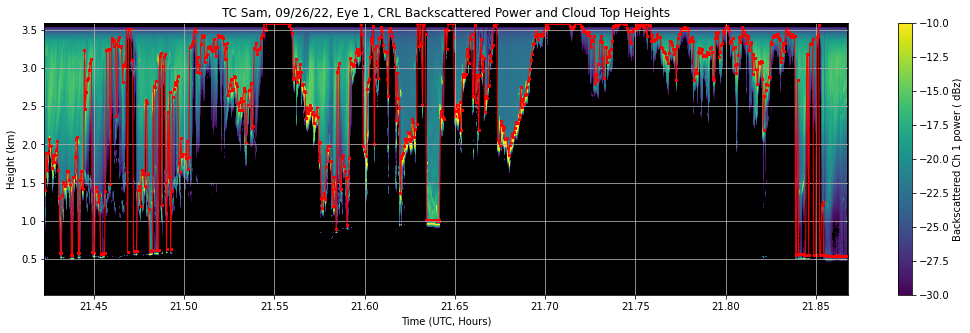

In [27]:
# quickly visualizing this dataset
plt.figure( figsize=(18, 5))
make_plots.plot_power_ch1( crl_path, crl_data, i1, i2, xaxis)

plt.scatter( xaxis_value, H, c= 'r', s=8, marker='s')
plt.plot( xaxis_value, H, c=  'r', linewidth=1, label= 'Cloud Top Height')
plt.xlabel( 'Time (UTC, Hours)')
plt.title( "TC Sam, 09/26/22, Eye 1, CRL Backscattered Power and Cloud Top Heights")

In [37]:
# print out some basic stats from the height dataset

print( "Mean height value: " + str( H.mean().values) + " km")
print( "Median height value: " + str( H.median().values) + " km")
print( "Range of height values: " + str( H.min().values) + " to " + str( H.max().values) + " km")


Mean height value: 2.6862552 km
Median height value: 3.1057 km
Range of height values: 0.53470004 to 3.5887 km


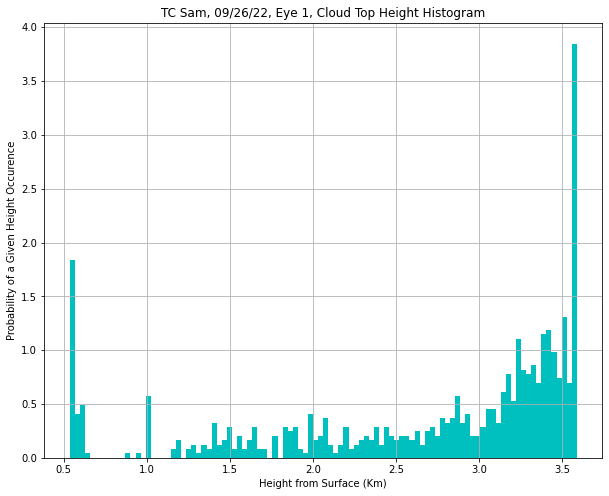

In [33]:
# view simple histogram of cloud top heights!

# **** see radiative transfer class, lab 1 or something, for how to make a histogram with a curved line superimposed
#      over the points! You need to use another library, not matplotlib ****

nbins = 100 # number of bins

plt.figure( figsize=( 10, 8))
plt.hist( H, nbins, density=True, facecolor='c', histtype = 'bar') # 'bar', 'barstacked', 'step', 'stepfilled'

plt.ylabel( 'Probability of a Given Height Occurence')
plt.xlabel( 'Height from Surface (Km)')
plt.title( "TC Sam, 09/26/22, Eye 1, Cloud Top Height Histogram")
plt.grid(True)